## Libraries

In [145]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier # to build a classification tree
from sklearn.tree import plot_tree # to draw a classification tree
from sklearn.model_selection import train_test_split # to split data into training and testing sets
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, classification_report 

from sklearn.tree import DecisionTreeRegressor

## Importing Data

In [146]:
df = pd.read_csv("https://raw.githubusercontent.com/engine2031/Data-Sets/main/Anonymize_Loan_Default_data.csv", encoding='unicode_escape')

In [147]:
df.head()

,Unnamed: 0,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,emp_length,...,total_acc,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,repay_fail
0,2,2,2,0.0,0.0,0.0,36 months,0.00,0.00,< 1 year,...,1.0,0.000000,0.00,0.00,0.00,Jan-07,0.00,Jan-07,Jan-07,1
1,3,545583,703644,2500.0,2500.0,2500.0,36 months,13.98,85.42,4 years,...,10.0,3075.291779,3075.29,2500.00,575.29,Jul-13,90.85,Aug-13,Jun-16,0
2,4,532101,687836,5000.0,5000.0,5000.0,36 months,15.95,175.67,4 years,...,15.0,2948.760000,2948.76,1909.02,873.81,Nov-11,175.67,NaN,Mar-12,1
3,5,877788,1092507,7000.0,7000.0,7000.0,36 months,9.91,225.58,10+ years,...,20.0,8082.391880,8082.39,7000.00,1082.39,Mar-14,1550.27,NaN,Mar-14,0
4,6,875406,1089981,2000.0,2000.0,2000.0,36 months,5.42,60.32,10+ years,...,15.0,2161.663244,2161.66,2000.00,161.66,Feb-14,53.12,NaN,Jun-16,0


In [148]:
#Summary for Numerical Values
df.select_dtypes(['float64']).describe()

,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,open_acc,pub_rec,revol_bal,total_acc,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,last_pymnt_amnt
count,38479.000000,38479.000000,38479.000000,38480.00000,38479.000000,3.847800e+04,38480.000000,38479.000000,38479.000000,14117.000000,38479.000000,38479.000000,3.847600e+04,38479.000000,38479.000000,38479.000000,38479.000000,38479.000000,38479.000000
mean,11094.727644,10831.856337,10150.141518,12.16430,323.163255,6.899531e+04,13.378119,0.151927,1.083942,35.009846,9.342966,0.057902,1.428987e+04,22.108501,11980.696892,11274.519569,9646.412705,2232.768235,2614.441757
std,7405.416042,7146.853682,7128.026828,3.73744,209.089097,6.447639e+04,6.744356,0.507592,1.534814,22.426843,4.498075,0.245707,2.194138e+04,11.588602,9006.505205,8946.229941,7051.828302,2570.177312,4391.969583
min,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,5200.000000,5100.000000,4950.000000,9.62000,165.740000,4.000000e+04,8.200000,0.000000,0.000000,17.000000,6.000000,0.000000,3.639750e+03,13.000000,5463.099238,4811.735000,4400.000000,657.700000,212.010000
50%,9750.000000,9600.000000,8495.792749,11.99000,277.980000,5.865000e+04,13.485000,0.000000,1.000000,33.000000,9.000000,0.000000,8.839500e+03,20.000000,9673.221341,8953.240000,8000.000000,1335.090000,526.000000
75%,15000.000000,15000.000000,14000.000000,14.72000,429.350000,8.200000e+04,18.690000,0.000000,2.000000,51.000000,12.000000,0.000000,1.726550e+04,29.000000,16402.394995,15486.925000,13315.100000,2795.020000,3169.815000
max,35000.000000,35000.000000,35000.000000,100.99000,1305.190000,6.000000e+06,100.000000,11.000000,33.000000,120.000000,47.000000,5.000000,1.207359e+06,90.000000,58563.679930,58563.680000,35000.020000,23611.100000,36115.200000


In [149]:
df["loan_status"].unique()

array(['Charged Off',
       'Does not meet the credit policy. Status:Fully Paid', 'Fully Paid',
       'Current', 'Does not meet the credit policy. Status:Charged Off',
       'Late (31-120 days)', 'In Grace Period', 'Late (16-30 days)',
       'Default'], dtype=object)

In [122]:
#Removing select variables
df = df.drop(["id", "member_id","last_pymnt_d", "next_pymnt_d", "last_credit_pull_d", "zip_code", "verification_status", "issue_d", "earliest_cr_line", "revol_util", "addr_state", "loan_status"], axis=1)


In [123]:
df.dtypes

Unnamed: 0                  int64
loan_amnt                 float64
funded_amnt               float64
funded_amnt_inv           float64
term                       object
int_rate                  float64
installment               float64
emp_length                 object
home_ownership             object
annual_inc                float64
purpose                    object
dti                       float64
delinq_2yrs               float64
inq_last_6mths            float64
mths_since_last_delinq    float64
open_acc                  float64
pub_rec                   float64
revol_bal                 float64
total_acc                 float64
total_pymnt               float64
total_pymnt_inv           float64
total_rec_prncp           float64
total_rec_int             float64
last_pymnt_amnt           float64
repay_fail                  int64
dtype: object

In [124]:

#Unique Values by column

numeric_columns = df.select_dtypes(include=['float', 'int']).columns

unique_values_sum_by_column = {}

for column in numeric_columns:
    unique_values_sum_by_column[column] = df[column].nunique()

print("Sum of unique values by column (for float and int columns):")
for column, sum_unique_values in unique_values_sum_by_column.items():
    print(f"{column}: {sum_unique_values}")

Sum of unique values by column (for float and int columns):
Unnamed: 0: 38480
loan_amnt: 881
funded_amnt: 1036
funded_amnt_inv: 8473
int_rate: 392
installment: 15475
annual_inc: 5191
dti: 2878
delinq_2yrs: 11
inq_last_6mths: 28
mths_since_last_delinq: 93
open_acc: 44
pub_rec: 6
revol_bal: 21470
total_acc: 81
total_pymnt: 36820
total_pymnt_inv: 36374
total_rec_prncp: 7907
total_rec_int: 34249
last_pymnt_amnt: 33868
repay_fail: 2


In [125]:
df["delinq_2yrs"].unique()

array([ 0.,  3.,  1.,  2.,  5., nan,  4.,  6., 11.,  7.,  9.,  8.])

In [126]:
df["pub_rec"].unique()

array([ 0.,  1., nan,  2.,  4.,  3.,  5.])

## Dealing With Missing Data 

In [127]:
df.isnull().sum()

Unnamed: 0                    0
loan_amnt                     1
funded_amnt                   1
funded_amnt_inv               1
term                          0
int_rate                      0
installment                   1
emp_length                  993
home_ownership                0
annual_inc                    2
purpose                       0
dti                           0
delinq_2yrs                   1
inq_last_6mths                1
mths_since_last_delinq    24363
open_acc                      1
pub_rec                       1
revol_bal                     4
total_acc                     1
total_pymnt                   1
total_pymnt_inv               1
total_rec_prncp               1
total_rec_int                 1
last_pymnt_amnt               1
repay_fail                    0
dtype: int64

In [128]:
#Dropping Column with large amount of missing data
df.drop(columns=['mths_since_last_delinq'], inplace=True)

In [129]:
#Drop balance of rows with missing data
df.dropna(inplace=True)

In [130]:
df.dtypes

Unnamed: 0           int64
loan_amnt          float64
funded_amnt        float64
funded_amnt_inv    float64
term                object
int_rate           float64
installment        float64
emp_length          object
home_ownership      object
annual_inc         float64
purpose             object
dti                float64
delinq_2yrs        float64
inq_last_6mths     float64
open_acc           float64
pub_rec            float64
revol_bal          float64
total_acc          float64
total_pymnt        float64
total_pymnt_inv    float64
total_rec_prncp    float64
total_rec_int      float64
last_pymnt_amnt    float64
repay_fail           int64
dtype: object

## Splitting the Data 

In [131]:
#new_df = df.drop(columns=['column_name'])


X = df.drop(columns=["repay_fail"])
y = df["repay_fail"]

## One-Hot Encoding 

In [132]:
X['term'].unique()

array(['36 months', '60 months'], dtype=object)

In [133]:
X['emp_length'].unique()

array(['< 1 year', '4 years', '10+ years', '3 years', '5 years',
       '7 years', '2 years', '1 year', '6 years', '9 years', '8 years'],
      dtype=object)

In [134]:
X['home_ownership'].unique()

array(['RENT', 'MORTGAGE', 'OWN', 'OTHER', 'NONE'], dtype=object)

In [135]:
#X['loan_status'].unique()

In [136]:
X['purpose'].unique()

array(['major_purchase', 'other', 'debt_consolidation', 'credit_card',
       'small_business', 'wedding', 'medical', 'car', 'home_improvement',
       'vacation', 'educational', 'house', 'moving', 'renewable_energy'],
      dtype=object)

In [137]:

# One hot encode variables 

X_encoded = pd.get_dummies(X, columns=["purpose",
                                        "home_ownership",
                                        "emp_length"])



X_encoded['term'] = X_encoded['term'].replace({'36 months': 0, '60 months': 1})


X_encoded.head()



,Unnamed: 0,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,annual_inc,dti,delinq_2yrs,...,emp_length_10+ years,emp_length_2 years,emp_length_3 years,emp_length_4 years,emp_length_5 years,emp_length_6 years,emp_length_7 years,emp_length_8 years,emp_length_9 years,emp_length_< 1 year
0,2,0.0,0.0,0.0,0,0.00,0.00,0.0,0.00,0.0,...,False,False,False,False,False,False,False,False,False,True
1,3,2500.0,2500.0,2500.0,0,13.98,85.42,20004.0,19.86,0.0,...,False,False,False,True,False,False,False,False,False,False
2,4,5000.0,5000.0,5000.0,0,15.95,175.67,59000.0,19.57,0.0,...,False,False,False,True,False,False,False,False,False,False
3,5,7000.0,7000.0,7000.0,0,9.91,225.58,53796.0,10.80,3.0,...,True,False,False,False,False,False,False,False,False,False
4,6,2000.0,2000.0,2000.0,0,5.42,60.32,30000.0,3.60,0.0,...,True,False,False,False,False,False,False,False,False,False


In [138]:
X_encoded.dtypes

Unnamed: 0                      int64
loan_amnt                     float64
funded_amnt                   float64
funded_amnt_inv               float64
term                            int64
int_rate                      float64
installment                   float64
annual_inc                    float64
dti                           float64
delinq_2yrs                   float64
inq_last_6mths                float64
open_acc                      float64
pub_rec                       float64
revol_bal                     float64
total_acc                     float64
total_pymnt                   float64
total_pymnt_inv               float64
total_rec_prncp               float64
total_rec_int                 float64
last_pymnt_amnt               float64
purpose_car                      bool
purpose_credit_card              bool
purpose_debt_consolidation       bool
purpose_educational              bool
purpose_home_improvement         bool
purpose_house                    bool
purpose_majo

In [139]:
y

0        1
1        0
2        1
3        0
4        0
        ..
38475    0
38476    0
38477    0
38478    0
38479    0
Name: repay_fail, Length: 37482, dtype: int64

## Building the Classification Tree

In [140]:
## split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2,  random_state=42)

## create a decisiont tree and fit it to the training data
clf_dt = DecisionTreeClassifier(random_state=42, max_depth=10)
clf_dt = clf_dt.fit(X_train, y_train)

In [141]:
clf_dt = DecisionTreeRegressor(random_state=1234)
clf_dt = clf_dt.fit(X_train, y_train)

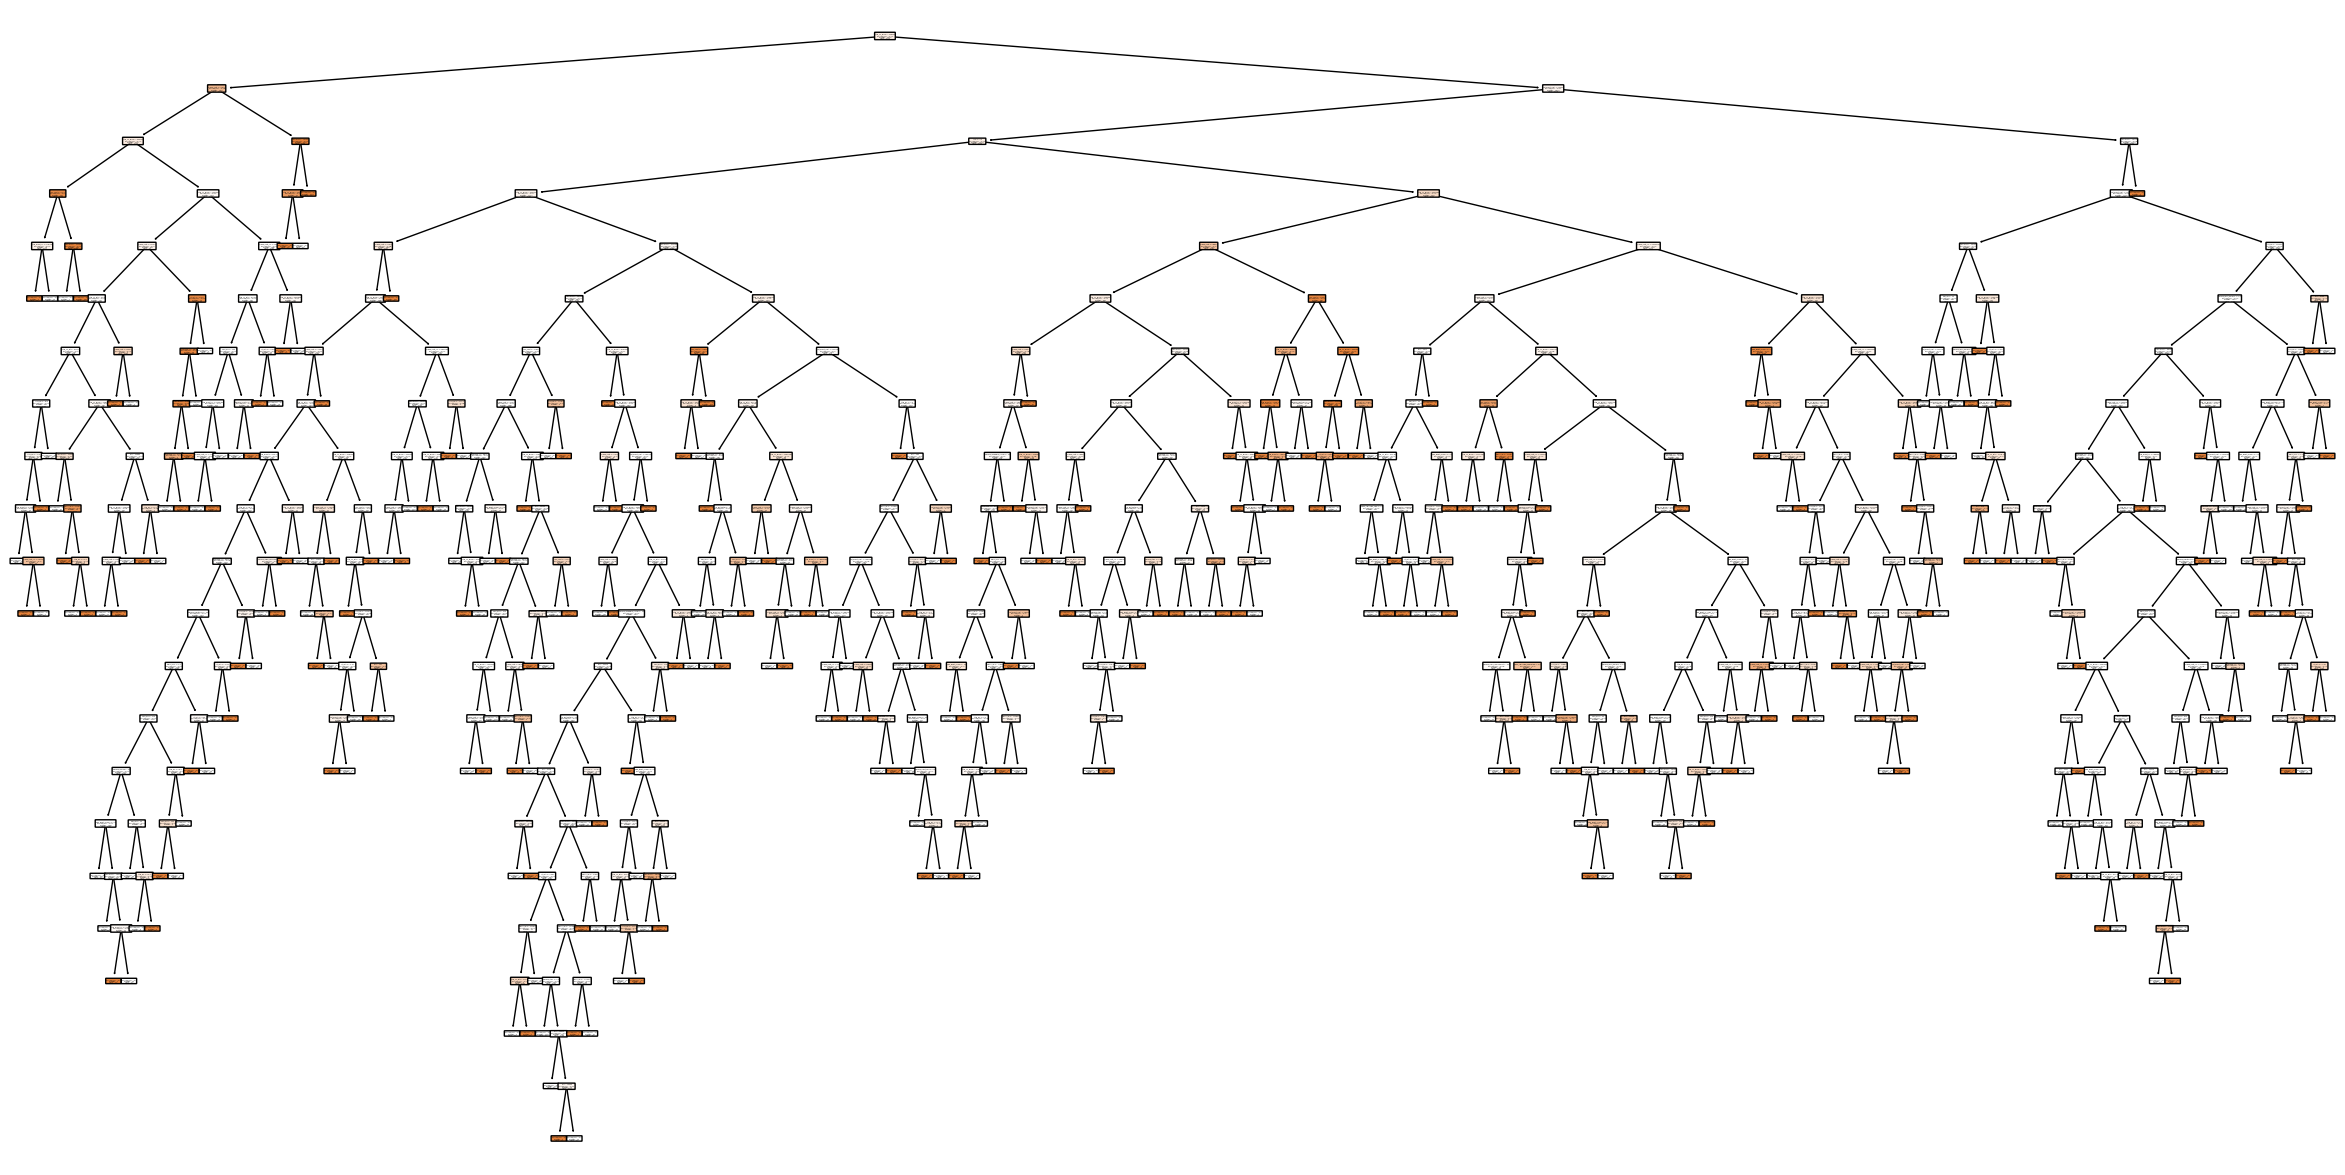

In [142]:
plt.figure(figsize=(30, 15))
plot_tree(clf_dt, 
          filled=True, 
          rounded=True, 
          class_names=["Repay_Fail_False", "Repay_Fail_True"], 
          feature_names=X_encoded.columns); 

In [143]:
y_predict = clf_dt.predict(X_test)

np.mean(y_predict == y_test)

0.9834600506869414

## Building a Random Forest 

In [152]:
from sklearn.ensemble import RandomForestClassifier


In [163]:
clf_rf = RandomForestClassifier(n_estimators=1000,
                                oob_score=True,
                                random_state=42)
clf_rf.fit(X_train, y_train)

RandomForestClassifier(n_estimators=1000, oob_score=True, random_state=42)

In [164]:
y2_pred = clf_rf.predict(X_test)

np.mean(y2_pred == y_test)

0.9823929571828731

Text(0.5, 1.0, 'Top Feature Importance')

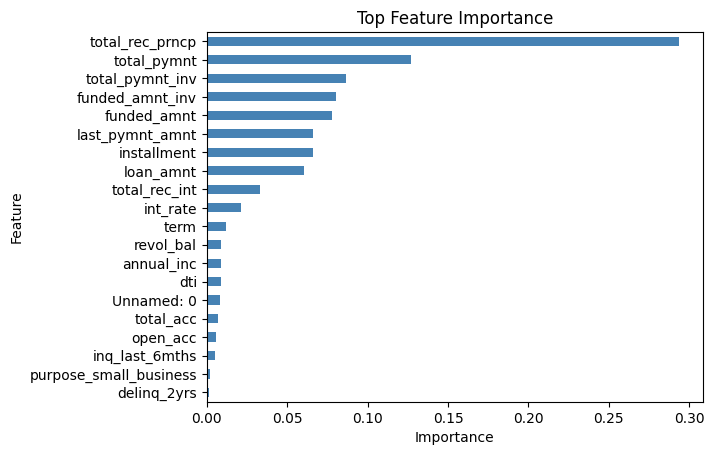

In [169]:
global_importances = pd.Series(clf_rf.feature_importances_, index=X_train.columns)
global_importances.sort_values(ascending=True, inplace=True)
top_20_importances = global_importances[-20:]

top_20_importances.plot.barh(color='steelblue')
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.title("Top Feature Importance")